In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('shap_total_avg_data.csv')

In [2]:
columns = np.array(data['Unnamed: 0'])

In [3]:
columns

array(['1_1', '1_2', '1_3', '2_1', '2_2', '2_3', '3_1', '3_2', '3_3',
       '4_1', '4_2', '4_3'], dtype=object)

In [4]:
np.array(data['0']).reshape(1, 12)

array([[0.33771516, 0.03529383, 0.35937791, 0.56870933, 0.03639224,
        0.67446095, 0.27149164, 0.0283942 , 0.34774273, 0.23042714,
        0.04637258, 0.08557769]])

In [5]:
new_data = pd.DataFrame(np.array(data['0']).reshape(1, 12), columns=columns)

In [6]:
new_data

,1_1,1_2,1_3,2_1,2_2,2_3,3_1,3_2,3_3,4_1,4_2,4_3
0,0.337715,0.035294,0.359378,0.568709,0.036392,0.674461,0.271492,0.028394,0.347743,0.230427,0.046373,0.085578


In [7]:
new_data['act_1'] = (new_data['1_1'] + new_data['1_2'] + new_data['1_3']) 
new_data['act_2'] = (new_data['2_1'] + new_data['2_2'] + new_data['2_3']) 
new_data['act_3'] = (new_data['3_1'] + new_data['3_2'] + new_data['3_3']) 
new_data['act_4'] = (new_data['4_1'] + new_data['4_2'] + new_data['4_3']) 

In [8]:
final = new_data[['act_1', 'act_2', 'act_3', 'act_4']]

In [9]:
final

,act_1,act_2,act_3,act_4
0,0.732387,1.279563,0.647629,0.362377


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
values = final.loc[0].tolist()

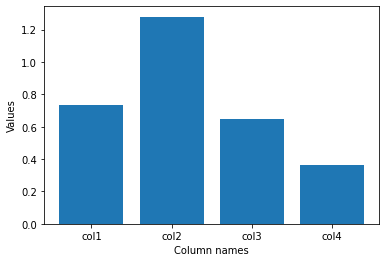

In [13]:
# create a bar plot
plt.bar(['col1', 'col2', 'col3', 'col4'], values)

# add labels to the x and y axis
plt.xlabel('Column names')
plt.ylabel('Values')

# display the plot
plt.show()

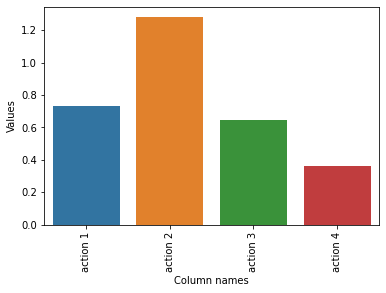

In [14]:
# create a bar plot using seaborn
sns.barplot(x=['action 1', 'action 2', 'action 3', 'action 4'], y=values)

# rotate the x-axis labels
plt.xticks(rotation=90)

# add labels to the x and y axis
plt.xlabel('Column names')
plt.ylabel('Values')

# display the plot
plt.show()

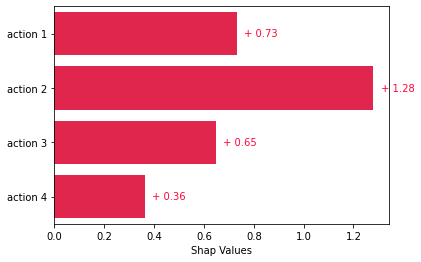

In [17]:
# create a horizontal bar plot using seaborn
sns.barplot(x=values, y=['action 1', 'action 2', 'action 3', 'action 4'], orient='h', color=sns.xkcd_rgb['neon red'])

# sns.set_style("whitegrid")
plt.xlabel('Shap Values')


for i in range(len(values)):
    plt.text(values[i]+0.03, i, f"+ {values[i]:.2f}", va='center', ha='left', color=sns.xkcd_rgb['neon red'])

# display the plot
plt.show()